# Traffic for Louisville

In [1]:
import numpy as np
import pandas as pd
import csv
import zipfile as z
import sqlite3
import matplotlib.pyplot as plt
import os

os.getcwd()

'C:\\Users\\reeva\\Documents\\code\\github\\traffic_project'

### Load the csv

In [2]:
# unzipping csv

#zf = z.ZipFile("Data/JEFFERSON COUNTY_CRASH DATA_2010-2017.zip","r")
#zf.extractall("Data")
#zf.close()

In [3]:
# sqlite DB

db = sqlite3.connect("Data/traffic_project.db")
#df1 = pd.read_csv("Data/JEFFERSON COUNTY_CRASH DATA_2010-2017.csv", header=0)
df1 = pd.read_csv("Data/traffic_quarterly.csv", header=None)
df1.to_sql("traffic", db, if_exists="replace")

def run_query(query):
    return pd.read_sql_query(query,db)

In [4]:
# delete csv file

#target_file = "Data/JEFFERSON COUNTY_CRASH DATA_2010-2017.csv"
  
#if os.path.isfile(target_file): 
#    os.remove(target_file) 
#    print("File deleted") 
#else: 
#    print(f'"{target_file}" not found')

### Table information via SQL

In [5]:
# table information

query = """SELECT * FROM sqlite_master ORDER BY name;"""
run_query(query)

,type,name,tbl_name,rootpage,sql
0,index,ix_traffic_index,traffic,133,"CREATE INDEX ""ix_traffic_index""ON ""traffic"" (""..."
1,table,traffic,traffic,2,"CREATE TABLE ""traffic"" (\n""index"" INTEGER,\n ..."
2,table,traffic_cleaned,traffic_cleaned,381,"CREATE TABLE traffic_cleaned(\n year INT,\n ..."


In [6]:
# more table information

query_table = """
select * from PRAGMA_TABLE_INFO('traffic');
"""
run_query(query_table)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,0,INTEGER,0,None,0
2,2,1,INTEGER,0,None,0
3,3,2,INTEGER,0,None,0
4,4,3,INTEGER,0,None,0
5,5,4,INTEGER,0,None,0
6,6,5,INTEGER,0,None,0
7,7,6,INTEGER,0,None,0


In [7]:
# View whole table

query = """SELECT * FROM traffic;"""
run_query(query)

,index,0,1,2,3,4,5,6
0,0,2007,9354,10611,11056,10238,41259,31021
1,1,2008,8459,9435,9947,9582,37423,27841
2,2,2009,7552,8975,9104,8252,33883,25631
3,3,2010,6755,8522,9226,8496,32999,24503
4,4,2011,6726,8227,8984,8542,32479,23937
5,5,2012,7521,8612,9171,8478,33782,25304
6,6,2013,7166,8207,9024,8496,32893,24397
7,7,2014,6856,8179,8799,8910,32744,23834
8,8,2015,7370,8823,9805,9486,35484,25998
9,9,2016,8154,9563,10078,10011,37806,27795


In [8]:
# Limiting selection to the data for the graph

query = """
SELECT 
"0" AS "Year", "1" AS "First Quarter", "2" AS "Second Quarter", "3" AS "Third Quarter", "4" AS "Fourth Quarter"
FROM traffic;
"""
run_query(query)

,Year,First Quarter,Second Quarter,Third Quarter,Fourth Quarter
0,2007,9354,10611,11056,10238
1,2008,8459,9435,9947,9582
2,2009,7552,8975,9104,8252
3,2010,6755,8522,9226,8496
4,2011,6726,8227,8984,8542
5,2012,7521,8612,9171,8478
6,2013,7166,8207,9024,8496
7,2014,6856,8179,8799,8910
8,2015,7370,8823,9805,9486
9,2016,8154,9563,10078,10011


### It isn't necessary to create a new table with the cleaned information but I'm trying it out here.

In [9]:
# drop old table if exists 
c = db.cursor()

Drop_TableName = "traffic_cleaned"

Drop_SQL = f"""DROP TABLE IF EXISTS {Drop_TableName};"""

c.execute(Drop_SQL)
c.close()

In [10]:
# create new table if not exists 
c = db.cursor()

Create_TableName = "traffic_cleaned"

Create_SQL = f"""
CREATE TABLE IF NOT EXISTS {Create_TableName} AS
SELECT 
"0" AS "year", "1" AS "first_quarter", "2" AS "second_quarter", "3" AS "third_quarter", "4" AS "fourth_quarter"
FROM traffic;
"""

c.execute(Create_SQL)
c.close()

traffic_cleaned = """SELECT * FROM traffic_cleaned;"""

run_query(traffic_cleaned)

,year,first_quarter,second_quarter,third_quarter,fourth_quarter
0,2007,9354,10611,11056,10238
1,2008,8459,9435,9947,9582
2,2009,7552,8975,9104,8252
3,2010,6755,8522,9226,8496
4,2011,6726,8227,8984,8542
5,2012,7521,8612,9171,8478
6,2013,7166,8207,9024,8496
7,2014,6856,8179,8799,8910
8,2015,7370,8823,9805,9486
9,2016,8154,9563,10078,10011


### Early graph information

In [11]:
# using pandas with the cleaned data table
df2 = pd.read_sql("""SELECT * FROM traffic_cleaned;""", db)
df2.head()

,year,first_quarter,second_quarter,third_quarter,fourth_quarter
0,2007,9354,10611,11056,10238
1,2008,8459,9435,9947,9582
2,2009,7552,8975,9104,8252
3,2010,6755,8522,9226,8496
4,2011,6726,8227,8984,8542


In [12]:
df2.first_quarter[0]

9354

In [13]:
# populating the array

traffic_incidents = []
x_labels = []

for count in range(0, len(df2.year)):
    traffic_incidents.append(df2.first_quarter[count])
    traffic_incidents.append(df2.second_quarter[count])
    traffic_incidents.append(df2.third_quarter[count])
    traffic_incidents.append(df2.fourth_quarter[count])
    x_labels.append("{} - Q1".format(df2.year[count]))
    x_labels.append("- Q2")
    x_labels.append("- Q3")
    x_labels.append("- Q4")

# the last quarter has no data so I'll drop it
traffic_incidents.pop()
x_labels.pop()

#traffic_incidents
#x_labels

'- Q4'

<Figure size 864x648 with 0 Axes>

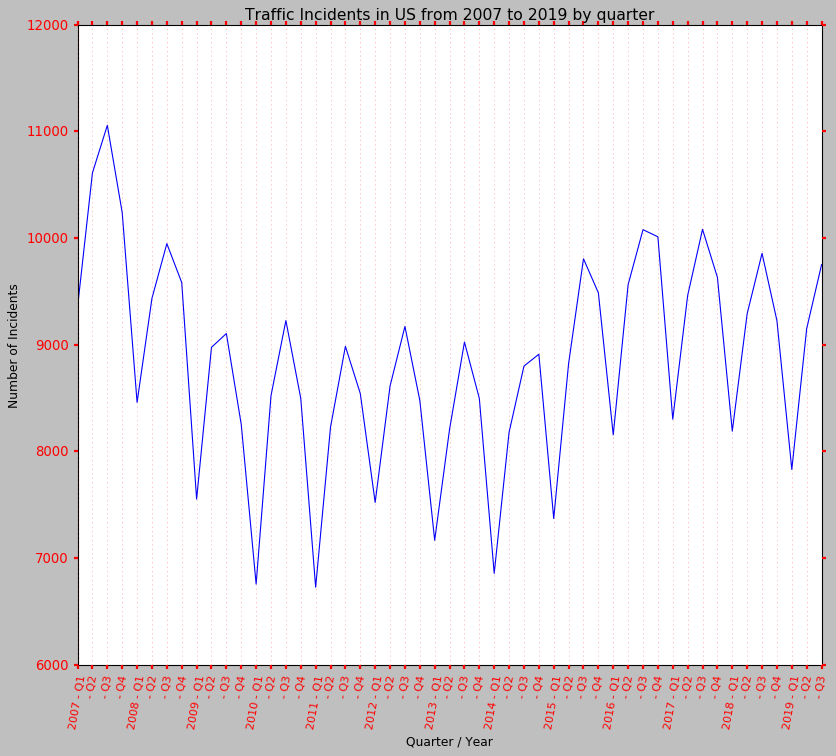

In [14]:
plt.figure(figsize=(12, 9))
plt.style.use('classic')

fig = plt.figure(figsize=(12, 10))

plt.title('Traffic Incidents in US from 2007 to 2019 by quarter', fontsize=14)
plt.xlabel('Quarter / Year', fontsize=11)
plt.ylabel('Number of Incidents', fontsize=11)

plt.grid(b=None, which='major', axis='x')

plt.xticks(np.arange(len(x_labels)), x_labels, rotation=80, fontsize=10)

plt.tick_params(direction='out', length=4, width=2, colors='r',
               grid_color='r', grid_alpha=0.5)

plt.plot(traffic_incidents)

fig.savefig('./flask/static/img/traffic_incidents.png')
plt.show()